# Project
## 분석 데이터 - 한국복지 패널
-  분석 내용(한국인의 삶을 파악하라)
1) 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?
2) 나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?
3) 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많이 받을까?
4) 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?
5) 직업별 월급 차이 - 어떤 직업이 월급 가장 많이 받을까?
6) 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?
7) 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?
8) 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

### 설치 및 라이브러리 설정

In [5]:
# !pip install pyreadstat    

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

import scipy.stats as stats

### 데이터 전처리
- https://www.koweps.re.kr:442/data/data/list.do
- 데이터 불러오기 및 검토
- 원하는 컬럼 추출 및 컬럼명 변경

In [4]:
data=pd.read_spss('./data/pandas/project/Koweps_hpwc14_2019_beta2.sav')
data.shape

(14418, 830)

In [5]:
data.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [6]:
data.to_csv('./data/pandas/project/Koweps_hpwc14_2019_beta2.csv', index=False) 

In [7]:
# 원하는 컬럼 추출
person=data[['h14_g3', 'h14_g4',  'h14_g10', 'h14_g11', 'p1402_8aq1', 'h14_eco9', 'h14_reg7']]
person.head()

,h14_g3,h14_g4,h14_g10,h14_g11,p1402_8aq1,h14_eco9,h14_reg7
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


In [8]:
# 컬럼명 변경
person=person.rename(columns={'h14_g3':'성별',
                             'h14_g4':'태어난연도',
                             'h14_g10':'혼인상태',
                             'h14_g11':'종교',
                             'p1402_8aq1':'월급',
                             'h14_eco9':'직업코드',
                             'h14_reg7':'지역코드' })
person.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


In [9]:
# csv 파이리로 저장 - 추후 사용
person.to_csv('./data/pandas/project/person.csv', index=False)

In [10]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  float64
 1   태어난연도   14418 non-null  float64
 2   혼인상태    14418 non-null  float64
 3   종교      14418 non-null  float64
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [11]:
person.isna().sum()

성별          0
태어난연도       0
혼인상태        0
종교          0
월급       9884
직업코드     7540
지역코드        0
dtype: int64

In [12]:
person.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
성별,14418,1,0,1,1,2,2,2
태어난연도,14418,1969,24,1907,1948,1968,1990,2018
혼인상태,14418,1,1,0,1,1,2,6
종교,14418,1,0,1,1,2,2,2
월급,4534,268,198,0,150,220,345,1892
직업코드,6878,587,264,111,313,611,873,1009
지역코드,14418,3,2,1,2,3,5,7


## 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?
- DDA: 분석에 활용할 변수(성별, 월급)를 전처리
    - 이상치, 결측치
    - 변수값 다루기 편하게 수정 -  남(1)/여(2)
- EDA : 변수 간 관계 분석
    - 데이터 요약표 (성별월급 평균표 만들기)
    - 그래프 : X(문자형/성별), Y(숫자형/월급) - BarChar
- CDA : 검증
    - X(문자형) / Y(숫자형) : 정규성 검증  >> 등분산 검증 >> 2집단, 3집단이상

### 성별 변수 검토 및 전처리
- 이상치, 결측치 체크
- 성별 값 수정 : 1(남), 2(여)

In [15]:
ex_one=person.copy()

In [16]:
ex_one['성별'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14418 entries, 0 to 14417
Series name: 성별
Non-Null Count  Dtype  
--------------  -----  
14418 non-null  float64
dtypes: float64(1)
memory usage: 112.8 KB


In [17]:
print("타입:", ex_one['성별'].dtypes)
print("사이즈:", ex_one['성별'].size)
print("결측치:", ex_one['성별'].isna().sum())

타입: float64
사이즈: 14418
결측치: 0


In [18]:
ex_one['성별'].describe()

count    14418.000000
mean         1.548828
std          0.497627
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: 성별, dtype: float64

In [19]:
ex_one['성별'].value_counts()

성별
2.0    7913
1.0    6505
Name: count, dtype: int64

In [60]:
# 이상치 >> 결측치 처리 >> 대체 또는 삭제
# ex_one['성별']=np.where(ex_one['성별'] == 9, np.nan, ex_one['성별'])
# ex_one['성별'].isna().sum()

In [35]:
# 성별 값 수정 - 다루기 편하게 수정
ex_one['성별']=np.where(ex_one['성별'] == 1.0, '남', '여')
ex_one['성별'].value_counts()

성별
여    7913
남    6505
Name: count, dtype: int64

<Axes: xlabel='성별', ylabel='count'>

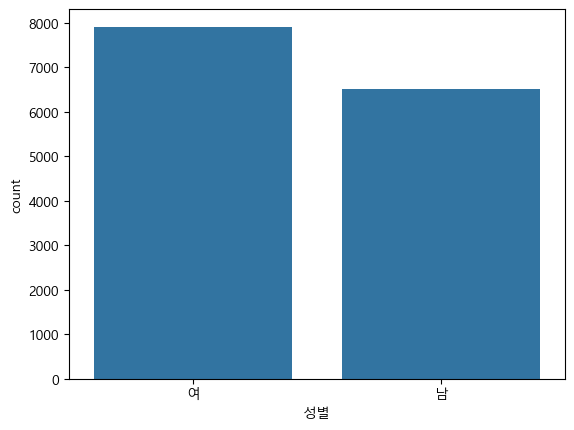

In [37]:
# 단일변수 - countplot, pie 

sns.countplot(data=ex_one, x='성별')

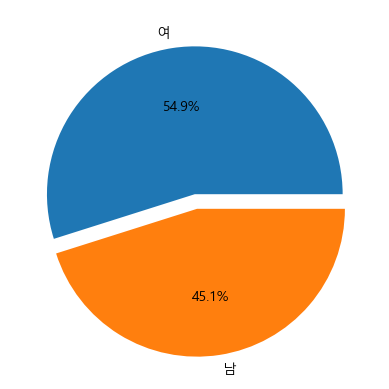

In [39]:
plt.pie(x=ex_one['성별'].value_counts(),
        labels=ex_one['성별'].value_counts().index,
        autopct='%.1f%%', 
        explode=[0, 0.1])
plt.show()

### 월급 변수 검토 및 전처리
- 이상치, 결측치 체크

In [44]:
# ex_one['월급'].info()

print("타입:", ex_one['월급'].dtypes)
print("사이즈:", ex_one['월급'].size)
print("결측치:", ex_one['월급'].isna().sum())

타입: float64
사이즈: 14418
결측치: 9884


In [46]:
ex_one['월급'].describe().astype(int)

count    4534
mean      268
std       198
min         0
25%       150
50%       220
75%       345
max      1892
Name: 월급, dtype: int32

In [56]:
# r=ex_one[ex_one['월급'] == 9999]
r=ex_one[ex_one['월급'] == 0]
r.shape

(7, 7)

In [52]:
r.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드
4715,여,1983.0,1.0,2.0,0.0,311.0,5.0
6347,여,1983.0,1.0,1.0,0.0,252.0,1.0
6632,여,1991.0,5.0,1.0,0.0,313.0,2.0
10487,여,1980.0,1.0,2.0,0.0,311.0,3.0
10620,여,1985.0,1.0,1.0,0.0,320.0,3.0


In [58]:
# ex_one['월급']=np.where(ex_one['월급'] == 9999, np.nan, ex_one['월급'])
# ex_one['월급']=np.where(ex_one['월급'] == 0, np.nan, ex_one['월급'])
# ex_one['월급'].isna().sum()

In [60]:
# 결측치
ex_one.dropna(inplace=True)
ex_one['월급'].isna().sum()

0

In [62]:
ex_one.shape

(4534, 7)

<Axes: xlabel='월급', ylabel='Count'>

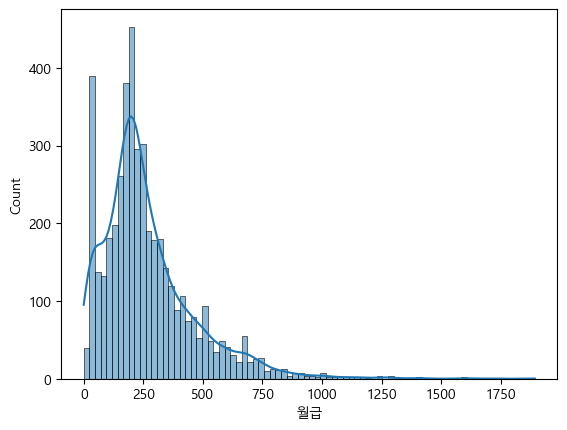

In [64]:
# 단일변수 - 연속형 시각화 :histplot, boxplot

sns.histplot(data=ex_one, x='월급', kde=True)

<Axes: xlabel='월급'>

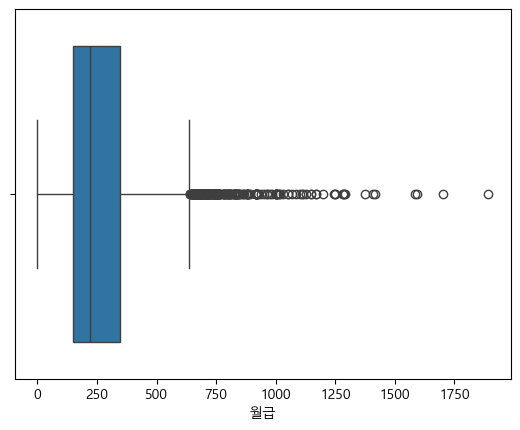

In [66]:
sns.boxplot(data=ex_one, x='월급')

### 성별, 월급 간 관계 분석
- 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?
    - 시각화
    - 데이터 요약

<Axes: xlabel='성별', ylabel='월급'>

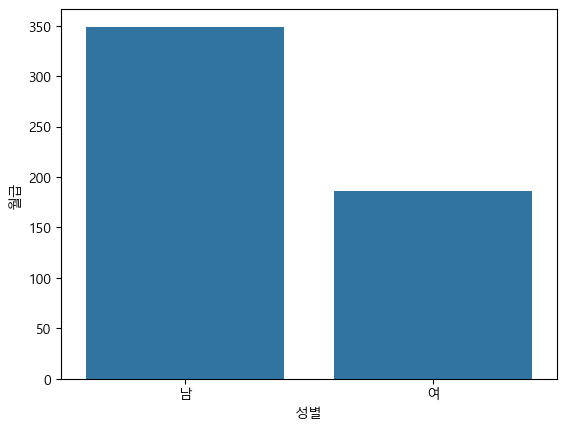

In [69]:
# 다변수 : X(문자형) / (숫자) - barplot

sns.barplot(data=ex_one, x='성별', y='월급', errorbar=None)

In [71]:
# 요약표
ex_one.groupby('성별')['월급'].mean()

성별
남    349.037571
여    186.293096
Name: 월급, dtype: float64

In [73]:
ex_one.groupby('성별')['월급'].mean().reset_index(name='월급평균')

,성별,월급평균
0,남,349.037571
1,여,186.293096


In [79]:
ex_one_tab=ex_one.pivot_table(
    index='성별',
    values='월급',
    aggfunc='mean'
)
ex_one_tab.rename(columns={'월급':'월급평균'}, inplace=True)
ex_one_tab

,월급평균
성별,
남,349.037571
여,186.293096


### 통계적 가설 검정
- 성별예 따른 월급 차이 - 성별에 따라 월급이 다를까?
- 다변수 : X(문자형) / Y(숫자형)
    - 정규성 검정 : 정규성(등분산, 이분산), 비정규  >> 2집단, 2집단 이상
    - 가설
        - 귀무가설 : 남녀간 월급의 차이가 없다.
        - 대립(연구) 가설 : 남녀간 월급의 차이가 있다. 
    - 분석결과(Wilcoxon Test) : 통계적으로 남여 월급의 차이가 있다. (p < 0.05)

In [82]:
# 정규성 검정
stats.normaltest(ex_one['월급'])   # 대립가설 참, 비정규분포

NormaltestResult(statistic=1657.4427188351524, pvalue=0.0)

In [86]:
# 비정규성 >> 2집단 >> wilcoxon Test
ex_one_m=ex_one[ex_one['성별'] == '남']
ex_one_f=ex_one[ex_one['성별'] == '여']
ex_one_m.shape, ex_one_f.shape

((2289, 7), (2245, 7))

In [88]:
stats.ranksums(ex_one_m['월급'], ex_one_f['월급'])

# 대립가설 참, 남여 월급의 차이가 있다. 

RanksumsResult(statistic=30.80580065407471, pvalue=2.1912606852089194e-208)

## 나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?
- 분석에 활용한 변수 (태어난연도, 월급)를 전처리
    - 이상치, 결측치 정제
    - 변수 값을 다루기 편하게 수정 : 태어난연도를 활용해서 나이(파생변수) 컬럼 만들기
- 변수 간 관계분석
    - 그래프 : X(나이 / 순서형), Y(월급 / 숫자헝) - LineChar
    - 데이터 요약표 (나이별 월급 평균표 만들기)
- 검증
    - X(숫자/순서형) / Y(연속형) : 상관분석
    - 정규성(personr), 비정규(spearmanr)

### 나이 변수 검토 및 전처리

In [95]:
ex_two=ex_one.copy()

In [97]:
# ex_two['태어난연도'].info()
print("타입:", ex_two['태어난연도'].dtypes)
print("사이즈:", ex_two['태어난연도'].size)
print("결측치:", ex_two['태어난연도'].isna().sum())

타입: float64
사이즈: 4534
결측치: 0


In [99]:
ex_two['태어난연도'].describe().astype(int)

count    4534
mean     1971
std        15
min      1928
25%      1961
50%      1972
75%      1982
max      2001
Name: 태어난연도, dtype: int32

In [ ]:
# 이상치 >> 결측치 처리 >> 대체 또는 삭제
# ex_two['태어난연도']=np.where(ex_two['태어난연도'] == 9999, np.nan, ex_two['태어난연도'])
# ex_two['태어난연도'].isna().sum()

In [101]:
# 파생변수 만들기 - 나이
current_year=pd.Timestamp.today().year
current_year

2025

In [107]:
ex_two['나이']=2019-person['태어난연도']+1   # 2019년에 조사가 진행된 데이터
ex_two.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,나이
2,남,1942.0,3.0,1.0,107.0,762.0,1.0,78.0
3,남,1962.0,1.0,1.0,192.0,855.0,1.0,58.0
7,여,1934.0,1.0,1.0,27.0,941.0,1.0,86.0
8,여,1940.0,2.0,1.0,27.0,999.0,2.0,80.0
14,남,1978.0,1.0,2.0,338.0,312.0,1.0,42.0


<Axes: xlabel='나이', ylabel='Count'>

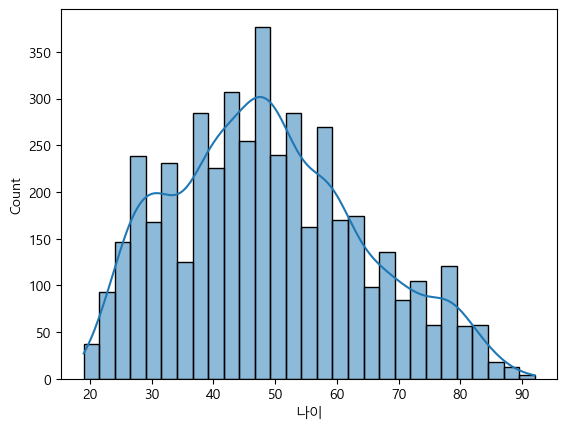

In [109]:
# 단일(숫자형) 변수 - histplot, boxplot
sns.histplot(data=ex_two, x='나이', kde=True)

### 월급 변수 검토 밎 전처리
- 1.2.2 전처리 참조

In [113]:
ex_two['월급'].info()

<class 'pandas.core.series.Series'>
Index: 4534 entries, 2 to 14416
Series name: 월급
Non-Null Count  Dtype  
--------------  -----  
4534 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB


### 나이와 월급 관계 분석
- 나이와 월급의 관계 : 몇 살때 월급을 가장 많이 받을까?
    - 시각화
    - 데이터 요약

In [118]:
# 나이별 그룹화, 월급 평균 구하
reslut=ex_two.groupby('나이')['월급'].mean().reset_index(name='나이월급평균')
reslut.head()

,나이,나이월급평균
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


In [122]:
max_row=reslut[reslut['나이월급평균'] == reslut['나이월급평균'].max()]
max_row

,나이,나이월급평균
25,44.0,386.195876


<Axes: xlabel='나이', ylabel='월급'>

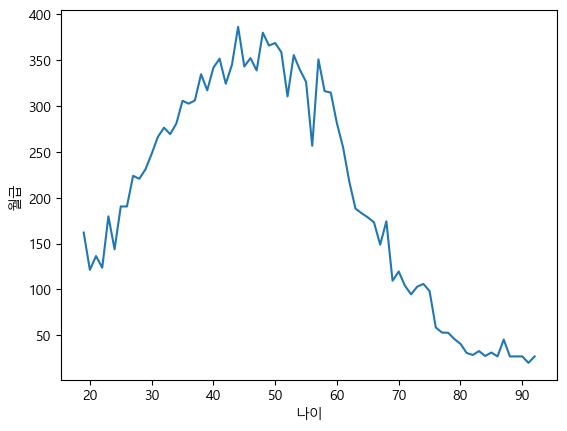

In [124]:
# 다변수 : X(순서형) / Y(숫자) : lineplot
sns.lineplot(data=ex_two, x='나이', y='월급', errorbar=None)

### 통계적 가설 검정
- 나이와 월급의 관계 
    - 다변수 : x, y - 숫자형
    - 상관분석 - 정규성, 비정규성
        - 귀무가설 : 나이와 월급은 상관이 없다.
        - 대립(연구) 가설 : 나이와 월급은 상관이 있다.
- 분석 결과 (spearmanr)
      - 나이와 월급은 산관이 있다. (통계량:0.29, p < 0.05)

In [129]:
ex_two_num=ex_two.select_dtypes(include='number')
round(ex_two_num.corr(), 2)

# 나이와 월급 -0.22 약한 상관 관계 /  60대부터 월급이 감소하는 경향

,태어난연도,혼인상태,종교,월급,직업코드,지역코드,나이
태어난연도,1.00,0.49,0.22,0.22,-0.43,-0.08,-1.00
혼인상태,0.49,1.00,0.10,-0.16,-0.11,-0.07,-0.49
종교,0.22,0.10,1.00,0.09,-0.06,0.03,-0.22
월급,0.22,-0.16,0.09,1.00,-0.35,-0.06,-0.22
직업코드,-0.43,-0.11,-0.06,-0.35,1.00,0.05,0.43
지역코드,-0.08,-0.07,0.03,-0.06,0.05,1.00,0.08
나이,-1.00,-0.49,-0.22,-0.22,0.43,0.08,1.00


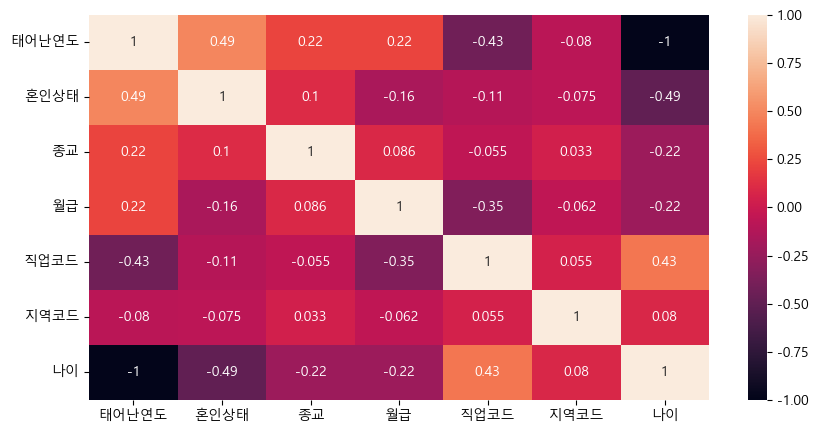

In [131]:
plt.figure(figsize=(10, 5))
sns.heatmap(ex_two_num.corr(), annot=True)
plt.show()

In [133]:
# 정규성 검정
stats.normaltest(ex_two['월급'])

NormaltestResult(statistic=1657.4427188351524, pvalue=0.0)

In [135]:
stats.spearmanr(ex_two['나이'], ex_two['월급'])

# 대립 참, 나이와 월급의 상관성이 있다. 

SignificanceResult(statistic=-0.2995003794137383, pvalue=1.2825223923244415e-94)

## 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많이 받을까?
- 분석에 활용할 변수 (나이, 월급)를 전처리
    - 이상치, 결측치 정제
    - 변수 값을 다루기 편하기 수정 - 나이를 활용한 연령대(파생변수) 변수 만들기
- 변수 간 관계 분석
    - 데이터 요약표 (나이별 월급 평균표 만들기)
    - 그래프
- 검증
    - X(문자형) / Y(숫자형) 정규성 검증 >> 정규성  >> 등분산 검증(등분산/이분산) >> 2집단, 3집단 
    -                                     >> 비정규  >> 2집단, 3집단

### 연령대 변수 검토 및 전처리 
- 연령 : 나이 >> 태어난연도

In [144]:
ex_three=ex_two.copy()
ex_three.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,나이
2,남,1942.0,3.0,1.0,107.0,762.0,1.0,78.0
3,남,1962.0,1.0,1.0,192.0,855.0,1.0,58.0
7,여,1934.0,1.0,1.0,27.0,941.0,1.0,86.0
8,여,1940.0,2.0,1.0,27.0,999.0,2.0,80.0
14,남,1978.0,1.0,2.0,338.0,312.0,1.0,42.0


In [148]:
# 연령대 변수 만들기 - 초년(30세 미만) / 중년(30 ~ 56세) / 노년(60세 이상)

ex_three['연령대']=np.where(ex_three['나이'] < 30, '초년', 
                        np.where(ex_three['나이'] <= 59, '중년', '노년'))
ex_three['연령대'].value_counts().sort_index()

연령대
노년    1093
중년    2927
초년     514
Name: count, dtype: int64

<Axes: xlabel='연령대', ylabel='count'>

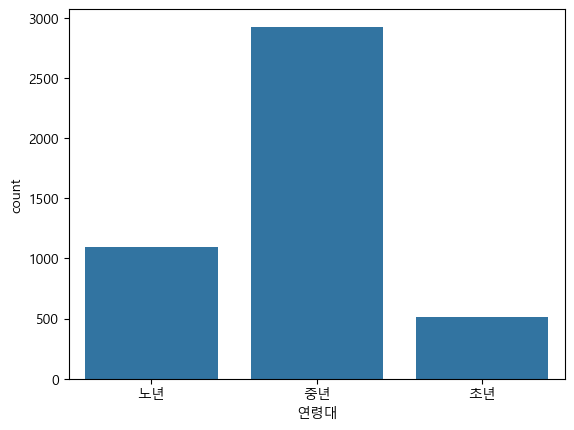

In [150]:
sns.countplot(data=ex_three, x='연령대')

### 월급 변수 검토
- 월급 전처리 1.2.2  참조

### 연령대와 월급의 관계 분석 - 어떤 연령대의 월급이 가장 많을까?
- 데이터 요약
- 시각화

<Axes: xlabel='연령대', ylabel='월급'>

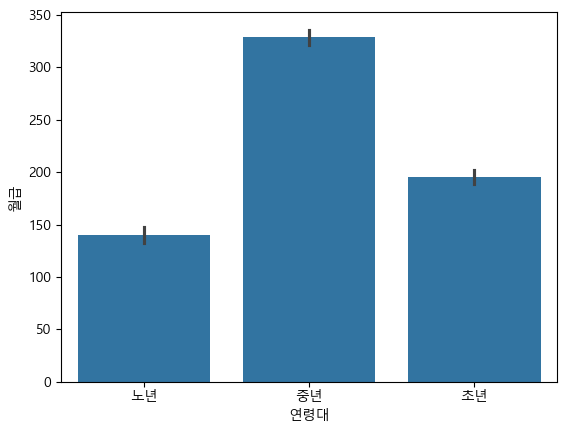

In [154]:
sns.barplot(data=ex_three, x='연령대', y='월급')

In [158]:
result=ex_three.groupby('연령대')['월급'].mean().reset_index(name="연령대평균월급")
result                                                     

,연령대,연령대평균월급
0,노년,140.129003
1,중년,329.157157
2,초년,195.663424


### 통계적 가설 검증
- 연령에 따른 월급 차이 - 연령의 따라 월급이 다를까?
- 다변수 : X 문자형 / Y 숫자형
- 가설
   - 귀무가설 : 연령대간 월급의 차이가 없다.
   - 대립(연구가설) : 연령대간 월급의 차이가 있다.
- 분석결과(Kruskal Willis Test)
   - 통계적 분석 결과 연령대간 월급의 차이가 있다. (통계량:1154.8, p < 0.05)

In [164]:
stats.normaltest(ex_three['월급'])

NormaltestResult(statistic=1657.4427188351524, pvalue=0.0)

In [166]:
# 비정규 >> 3집단 >> Kruskal Willis Test

x=ex_three[ex_three['연령대'] == '노년']
y=ex_three[ex_three['연령대'] == '중년']
z=ex_three[ex_three['연령대'] == '초년']
x.shape, y.shape, z.shape

((1093, 9), (2927, 9), (514, 9))

In [168]:
stats.kruskal(x['월급'], y['월급'], z['월급'])

# 대림가설 참, 연령대별 월급의 차이가 있다.

KruskalResult(statistic=1154.8545662293197, pvalue=1.6846793127448966e-251)

In [171]:
ex_three.to_csv('./data/pandas/project/ex_three.csv', index=False)

## 연령대별 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?
### 변수 검토 및 전처리
- 연령대(1-4-1), 성별(1-2-1), 월급(1-2-2) 전처리 참조

In [8]:
ex_four=pd.read_csv('./data/pandas/project/ex_three.csv')
ex_four.head(2)

,Unnamed: 0,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,나이,연령대
0,2,남,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,노년
1,3,남,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,중년


### 분석 및 결과
- 시각화 : X(문자) / Y(숫자)
- 데이터 요약 

<Axes: xlabel='연령대', ylabel='월급'>

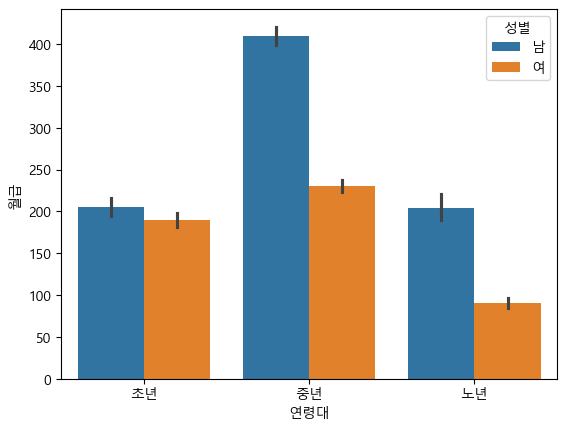

In [15]:
sns.barplot(data=ex_four, x='연령대', y='월급', hue='성별', order=['초년', '중년', '노년'])

- 통계적 가설 검증(모집단)
- 귀무가설 : 성별 월급 차이는 연령대별로 없다.
- 대립(연구)가설 : 성별 월급 차이는 연령대별로 있다.
- 월급 >> 비정규성 >> 3집단 이상 Kruskal Wills Test

In [22]:
m=ex_four[ex_four['성별']=='남']
f=ex_four[ex_four['성별']=='여']

o=ex_four[ex_four['연령대']=='노년']
y=ex_four[ex_four['연령대']=='중년']
b=ex_four[ex_four['연령대']=='초년']

stats.kruskal(m['월급'], f['월급'], o['월급'], y['월급'], b['월급'])

# 통계적(Kruskal Wills Test) 결론 : 
# 통계적으로 성별 월급차이는 연령대별로 차이가 있다. (통계량 2104.3, p < 0.05)

KruskalResult(statistic=2104.3728897890423, pvalue=0.0)

## 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?
### 직업 변수 검토 및 전처리
- 직업코드 변수와 코드북의 직업분류코드 병합

In [61]:
person=pd.read_csv('./data/pandas/project/person.csv')
ex_five=person.copy()
ex_five.shape

(14418, 7)

In [63]:
ex_five.head(2)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0


In [65]:
ex_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  float64
 1   태어난연도   14418 non-null  float64
 2   혼인상태    14418 non-null  float64
 3   종교      14418 non-null  float64
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [67]:
ex_five['직업코드'].value_counts()

직업코드
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

### 코드북의 직업분류코드

In [70]:
job_data=pd.read_excel('./data/pandas/project/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
job_data.shape

(156, 2)

In [72]:
job_data.head(2)

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원


In [74]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code_job  156 non-null    int64 
 1   job       156 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [76]:
job_list=job_data.rename(columns={'code_job':'직업코드', 'job':'직무내용'})
job_list.head(2)

,직업코드,직무내용
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원


In [78]:
job_list.to_excel('./data/pandas/project/joblist.xlsx', index=False)

### 한국복지패널과 직업분류 코드 병합

In [81]:
ex_five_merage=ex_five.merge(job_list, on='직업코드', how='inner')
ex_five_merage.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용
0,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공
1,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원
2,2.0,1934.0,1.0,1.0,27.0,941.0,1.0,청소원 및 환경미화원
3,2.0,1940.0,2.0,1.0,27.0,999.0,2.0,기타 서비스 관련 단순 종사자
4,1.0,1978.0,1.0,2.0,338.0,312.0,1.0,경영 관련 사무원


In [83]:
ex_five_merage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      6878 non-null   float64
 1   태어난연도   6878 non-null   float64
 2   혼인상태    6878 non-null   float64
 3   종교      6878 non-null   float64
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    6878 non-null   float64
 7   직무내용    6878 non-null   object 
dtypes: float64(7), object(1)
memory usage: 430.0+ KB


In [85]:
ex_five_merage.dropna(inplace=True)

In [87]:
ex_five_merage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 0 to 6877
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      4534 non-null   float64
 1   태어난연도   4534 non-null   float64
 2   혼인상태    4534 non-null   float64
 3   종교      4534 non-null   float64
 4   월급      4534 non-null   float64
 5   직업코드    4534 non-null   float64
 6   지역코드    4534 non-null   float64
 7   직무내용    4534 non-null   object 
dtypes: float64(7), object(1)
memory usage: 318.8+ KB


### 분석
- 직업별 월급 차이 : 어떤 직업이 월급을 가장 많이 받을까?
- 시각화
- 데이터 요약 - 직업별 월급 평균표

<Axes: xlabel='직무내용', ylabel='월급'>

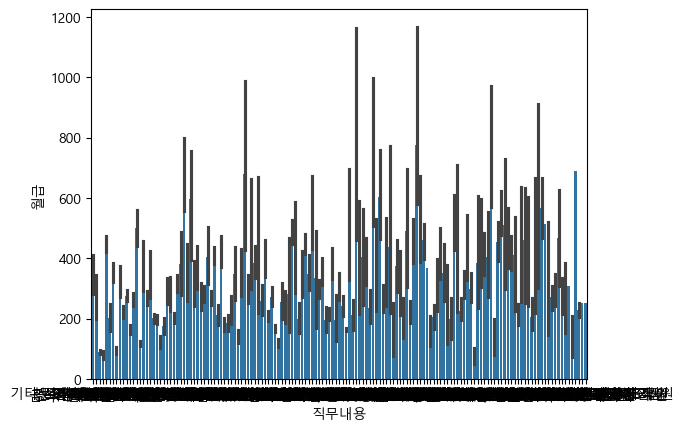

In [90]:
sns.barplot(data=ex_five_merage, x='직무내용', y='월급')

In [91]:
#  직업별 월급 평균표
result=ex_five_merage.groupby('직무내용')['월급'].mean().reset_index(name="직업별평균월급")
result

,직무내용,직업별평균월급
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [92]:
type(result)

pandas.core.frame.DataFrame

In [93]:
# 상위 10개 추출
top10=result.sort_values('직업별평균월급', ascending=False).head(10)
top10

,직무내용,직업별평균월급
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='직업별평균월급', ylabel='직무내용'>

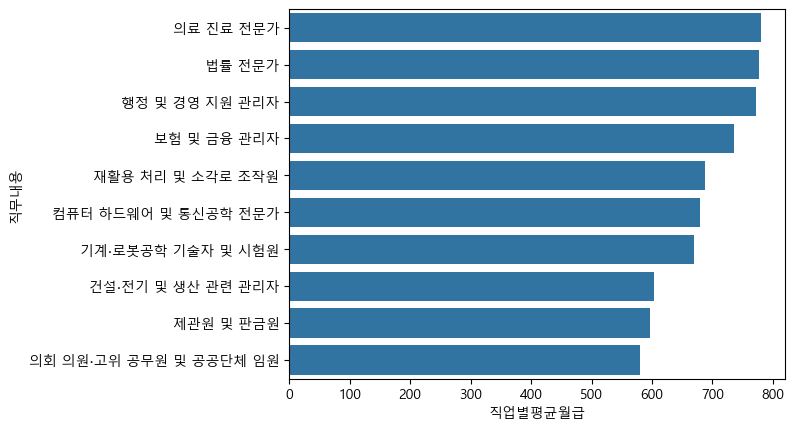

In [94]:
sns.barplot(data=top10, y='직무내용', x='직업별평균월급')

In [95]:
# 하위 10
bottom10=result.sort_values('직업별평균월급').head(10)
bottom10

,직무내용,직업별평균월급
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


<Axes: xlabel='직업별평균월급', ylabel='직무내용'>

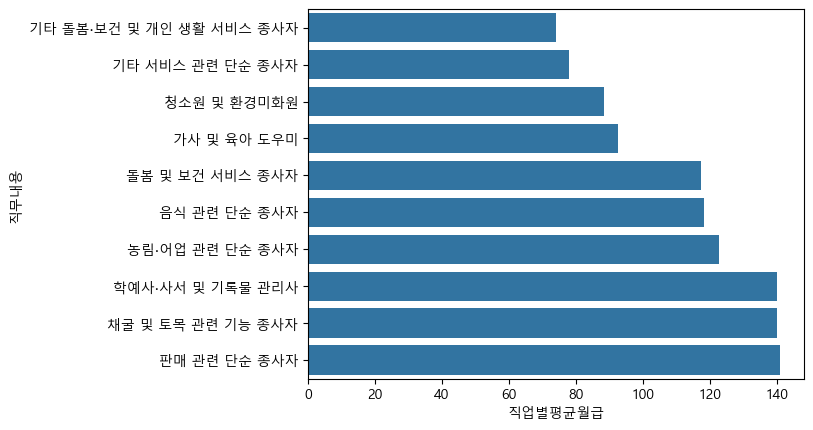

In [96]:
sns.barplot(data=bottom10,  y='직무내용', x='직업별평균월급')

### 통계적 가설 검증
- 직업별 월급 차이가 없다 / 있다
- 비정규성 >> 3집단 이상  Kruskal Wills Test
- 분석결과(Kruskal Wills Test) : 통계적으로 직업별 월급 차이가 있다. / 통계량 2504.6, p < 0.05

In [98]:
# ex_five_merage['직무내용'].unique()

In [99]:
job_gropus=[]

for job in ex_five_merage['직무내용'].unique():

    job_salary=ex_five_merage[ex_five_merage['직무내용'] == job]['월급']
    
    # print(job, job_salary)
    job_gropus.append(job_salary)

len(job_gropus)
# job_gropus

147

In [100]:
stats.kruskal(*job_gropus)   # 0보건['월급'], 1강사['월급']

# * : 리스트 튜플과 같은 반복 가능한 객체를 개별 인자로 전달

KruskalResult(statistic=2504.604573255475, pvalue=0.0)

## 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?
### 전처리
- 성별, 직업코드, 직무내용

In [102]:
ex_six_imsi=ex_five_merage[['성별', '직업코드', '직무내용']]
ex_six_imsi.head(2)

,성별,직업코드,직무내용
0,1.0,762.0,전기공
1,1.0,855.0,금속기계 부품 조립원


In [107]:
ex_six=ex_six_imsi.copy()
ex_six['성별']=np.where(ex_six['성별']==1.0, '남', '여')
ex_six['성별'].value_counts()

성별
남    2289
여    2245
Name: count, dtype: int64

In [115]:
# 남성의 직업빈도수
male=ex_six[ex_six['성별'] == '남']
male_count=male['직무내용'].value_counts().head(10)
male_count

직무내용
경영 관련 사무원           212
자동차 운전원             114
청소원 및 환경미화원          92
영업 종사자               91
건물 관리원 및 검표원         78
행정 사무원               74
제조 관련 단순 종사자         69
매장 판매 종사자            60
전기∙전자기기 설치 및 수리원     52
배달원                  52
Name: count, dtype: int64

Text(0.5, 0, '인원수')

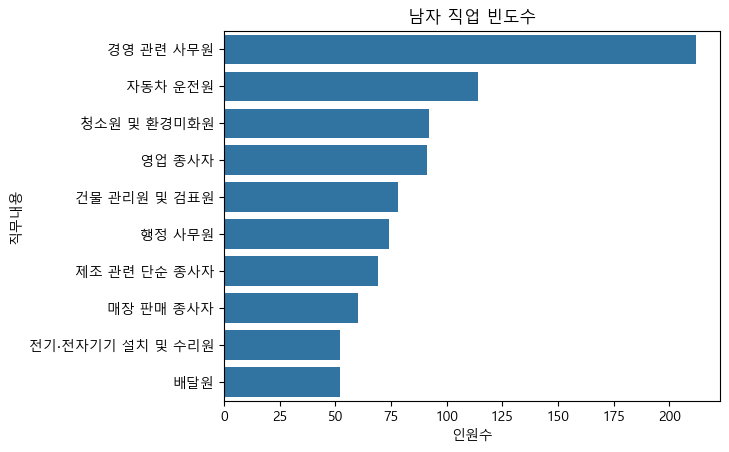

In [116]:
sns.countplot(data=male, y="직무내용", order=male_count.index)
plt.title("남자 직업 빈도수")
plt.xlabel("인원수")

In [117]:
# 여성의 직업빈도수
female=ex_six[ex_six['성별'] == '여']
female_count=female['직무내용'].value_counts().head(10)
female_count

직무내용
청소원 및 환경미화원         261
회계 및 경리 사무원         151
돌봄 및 보건 서비스 종사자     151
제조 관련 단순 종사자        128
매장 판매 종사자           106
음식 관련 단순 종사자        101
기타 서비스 관련 단순 종사자     83
고객 상담 및 기타 사무원       74
조리사                  72
간호사                  70
Name: count, dtype: int64

Text(0.5, 0, '인원수')

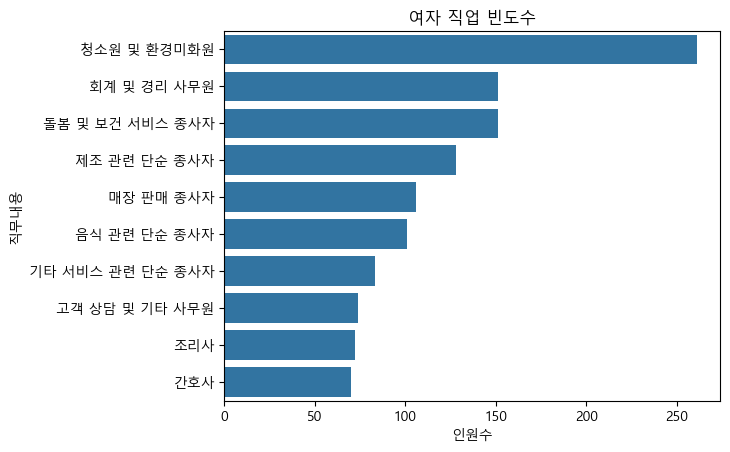

In [118]:
sns.countplot(data=female, y='직무내용', order=female_count.index)
plt.title("여자 직업 빈도수")
plt.xlabel("인원수")

### 분석
- 시각화
- 데이터 요약표 : 남녀 직업별 빈도수

<Axes: title={'center': '남녀 직업 빈도수'}, xlabel='인원수', ylabel='직무내용'>

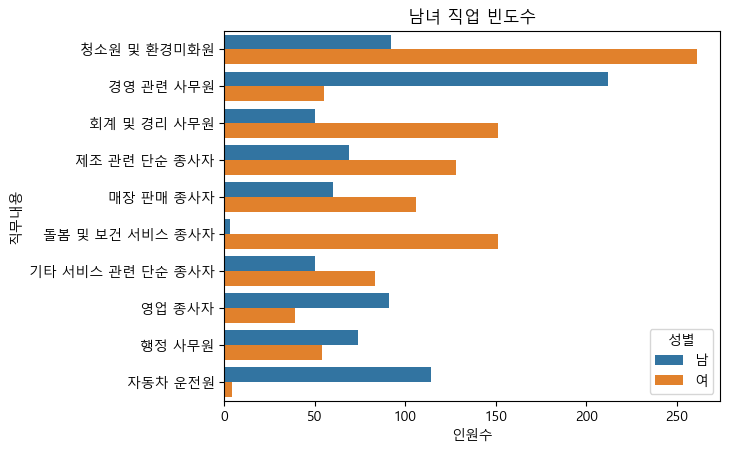

In [121]:
top=ex_six['직무내용'].value_counts().head(10)

plt.title("남녀 직업 빈도수")
plt.xlabel("인원수")
sns.countplot(data=ex_six, y='직무내용', hue='성별', order=top.index)

In [122]:
# 성별 요약표 - 직무내용 그룹화
result=ex_six.groupby(['직무내용', '성별'])['성별'].count().reset_index(name='인원수')
result.sort_values('인원수', ascending=False).head(10)

,직무내용,성별,인원수
204,청소원 및 환경미화원,여,261
17,경영 관련 사무원,남,212
235,회계 및 경리 사무원,여,151
70,돌봄 및 보건 서비스 종사자,여,151
194,제조 관련 단순 종사자,여,128
171,자동차 운전원,남,114
75,매장 판매 종사자,여,106
160,음식 관련 단순 종사자,여,101
203,청소원 및 환경미화원,남,92
146,영업 종사자,남,91


### 통계적 가설 검증
- 성별에 따라 직무의 차이가 없다 / 있다 (연관성)
- 다변수 : X/Y - 문자형
- Chi Square Test
- 분석결과(Chi Square Test) : 성별에 따른 직업의 차이가 있다. (통계량 1979.0, p < 0.05)

In [139]:
ex_six_crosstab=pd.crosstab(ex_six['직무내용'], ex_six['성별'])
ex_six_crosstab

성별,남,여
직무내용,,
가사 및 육아 도우미,1,67
간호사,3,70
감정∙기술영업및중개관련종사자,14,4
건물 관리원 및 검표원,78,2
건설 및 광업 단순 종사자,35,5
...,...,...
화학∙고무 및 플라스틱 제품 생산기 조작원,7,0
화학공학 기술자 및 시험원,6,0
환경∙청소 및 경비 관련 관리자,8,2


In [141]:
r=stats.chi2_contingency(ex_six_crosstab)
r.statistic, r.pvalue

(1979.0205094555938, 0.0)

## 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

In [143]:
person=pd.read_csv('./data/pandas/project/person.csv')
person.shape

(14418, 7)

In [144]:
job_list=pd.read_excel('./data/pandas/project/joblist.xlsx')
job_list.shape
job_list.head(2)

,직업코드,직무내용
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원


In [148]:
pj_mearage=person.merge(job_list, on='직업코드', how='left')
pj_mearage.shape

(14418, 8)

In [149]:
ex_seven=pj_mearage.copy()
ex_seven.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,NaN
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,NaN
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,NaN


In [150]:
ex_seven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  float64
 1   태어난연도   14418 non-null  float64
 2   혼인상태    14418 non-null  float64
 3   종교      14418 non-null  float64
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  float64
 7   직무내용    6878 non-null   object 
dtypes: float64(7), object(1)
memory usage: 901.3+ KB


### 종교 변수 검토 및 전처리
- 종교변수 전처리 : 1 있음 >> 유,  2 없음 >> 무,  9 모름 >> 무응답

In [152]:
ex_seven['종교'].value_counts()

종교
2.0    7815
1.0    6603
Name: count, dtype: int64

In [153]:
ex_seven['종교']=np.where(ex_seven['종교']==1, '유', '무')
ex_seven['종교'].value_counts()

종교
무    7815
유    6603
Name: count, dtype: int64

<Axes: xlabel='종교', ylabel='count'>

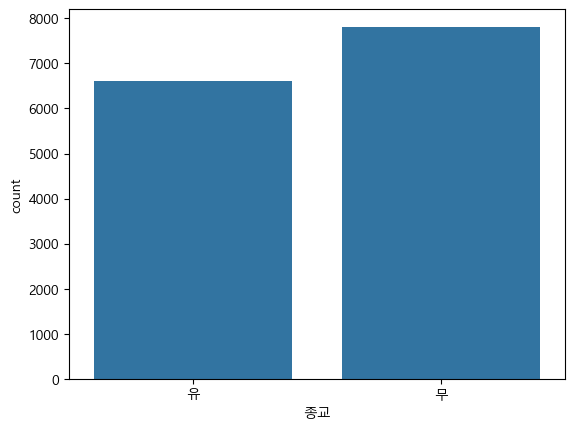

In [154]:
sns.countplot(data=ex_seven, x="종교")

### 혼인 상태 변수 검토 및 전처리
- 코드북 확인: 0 ~ 6
- 파생변수 만들기 :  1 >> 유배우, 3 >> 이혼,  2, 4, 5, 6 >> 기타

In [159]:
ex_seven['혼인타입']=np.where(ex_seven['혼인상태']==1, '유배우',
                              np.where(ex_seven['혼인상태']==3, '이혼', '기타'))
ex_seven['혼인타입'].value_counts()

혼인타입
유배우    7190
기타     6539
이혼      689
Name: count, dtype: int64

In [161]:
ex_seven.head(2)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,혼인타입
0,2.0,1945.0,2.0,유,NaN,NaN,1.0,NaN,기타
1,1.0,1948.0,2.0,무,NaN,NaN,1.0,NaN,기타


In [163]:
rel_df=ex_seven[ex_seven['혼인타입'] != '기타']
rel_df.shape

(7879, 9)

In [165]:
rel_df['혼인타입'].value_counts()

혼인타입
유배우    7190
이혼      689
Name: count, dtype: int64

<Axes: xlabel='혼인타입', ylabel='count'>

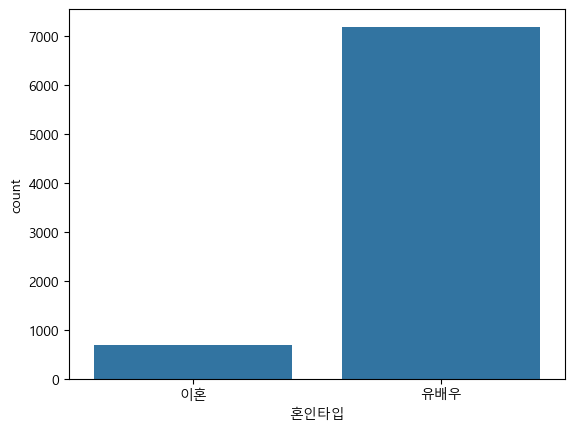

In [166]:
sns.countplot(data=rel_df, x='혼인타입')

### 데이터 분석
- 종교 유무에 따른 이혼욜 : 종교가 있으면 이혼을 덜 할까?
    - 시각화
    - 데이터 요약표 - 종교유무의 이혼율 빈도수

<Axes: xlabel='혼인타입', ylabel='count'>

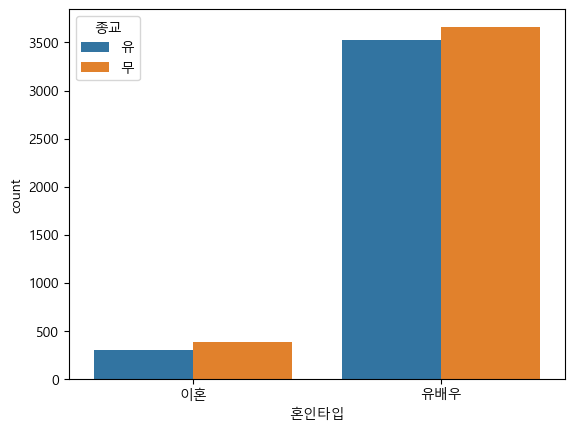

In [168]:
sns.countplot(data=rel_df, x='혼인타입', hue='종교')

In [169]:
# 데이터 요약표 - 종교별 그룹화 후 혼인 비율 구하기
result=rel_df.groupby(['종교', '혼인타입'])['혼인타입'].count().reset_index(name="인원수")
result['인원수백분율']=round(result['인원수'] / result['인원수'].sum() * 100 , 1)
result

,종교,혼인타입,인원수,인원수백분율
0,무,유배우,3660,46.5
1,무,이혼,384,4.9
2,유,유배우,3530,44.8
3,유,이혼,305,3.9


In [170]:
result[result['혼인타입'] == '이혼']

,종교,혼인타입,인원수,인원수백분율
1,무,이혼,384,4.9
3,유,이혼,305,3.9


### 통계적 가설 검증
- 가설 : 연관성이 없다(독립) / 연관성이 있다. 
- 다변 : X/Y - Chi^2 Test
- 분석결과(Chi^2) : 종교와 이혼율은 연관성이 있다. (통계량 5.67, p < 0.05)

In [173]:
ex_seven_tab=pd.crosstab(rel_df['혼인타입'], rel_df['종교'])
ex_seven_tab

종교,무,유
혼인타입,,
유배우,3660,3530
이혼,384,305


In [174]:
stats.chi2_contingency(ex_seven_tab)

Chi2ContingencyResult(statistic=5.6769927793878825, pvalue=0.01718880447200066, dof=1, expected_freq=array([[3690.36172103, 3499.63827897],
       [ 353.63827897,  335.36172103]]))

## 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?
### 연령대 변수 검토 및 전처리

In [178]:
ex_eight=ex_seven.copy()
ex_eight.head(2)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,혼인타입
0,2.0,1945.0,2.0,유,NaN,NaN,1.0,NaN,기타
1,1.0,1948.0,2.0,무,NaN,NaN,1.0,NaN,기타


In [179]:
# 파생변수 만들기 - 나이
ex_eight['나이']=2019-ex_eight['태어난연도']+1

# 연령대 변수 만들기
ex_eight['연령대']=np.where(ex_eight['나이'] < 30, '초년층', 
                         np.where(ex_eight['나이'] <=59, '중년층', '노년층'))
ex_eight['연령대'].value_counts().sort_index()

연령대
노년층    5955
중년층    4963
초년층    3500
Name: count, dtype: int64

In [180]:
ex_eight.head(3)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,혼인타입,나이,연령대
0,2.0,1945.0,2.0,유,NaN,NaN,1.0,NaN,기타,75.0,노년층
1,1.0,1948.0,2.0,무,NaN,NaN,1.0,NaN,기타,72.0,노년층
2,1.0,1942.0,3.0,유,107.0,762.0,1.0,전기공,이혼,78.0,노년층


###  지역코드 검토 및 전처리

#### 지역코드 목록 만들기

In [187]:
list_region=pd.DataFrame({'지역코드':[1, 2, 3, 4, 5, 6, 7],
                           '지역':['서울',
                                   '수도권(인천/경기)',
                                   '부산/경남/울산',
                                   '대구/경북',
                                   '대전/충남',
                                   '강원/충북',
                                   '광주/전남/전북/제주']})
list_region

,지역코드,지역
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주


#### 병합 - 지역코드, 지역명 

In [190]:
ex_eight_merge=ex_eight.merge(list_region, on='지역코드', how='left')
ex_eight_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  float64
 1   태어난연도   14418 non-null  float64
 2   혼인상태    14418 non-null  float64
 3   종교      14418 non-null  object 
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  float64
 7   직무내용    6878 non-null   object 
 8   혼인타입    14418 non-null  object 
 9   나이      14418 non-null  float64
 10  연령대     14418 non-null  object 
 11  지역      14418 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.3+ MB


In [191]:
ex_eight_merge.head(2)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,혼인타입,나이,연령대,지역
0,2.0,1945.0,2.0,유,NaN,NaN,1.0,NaN,기타,75.0,노년층,서울
1,1.0,1948.0,2.0,무,NaN,NaN,1.0,NaN,기타,72.0,노년층,서울


### 데이터 분석
- 지역별 연령대 비율
    - 시각화
    - 데이터 요약표 

<Axes: xlabel='count', ylabel='지역'>

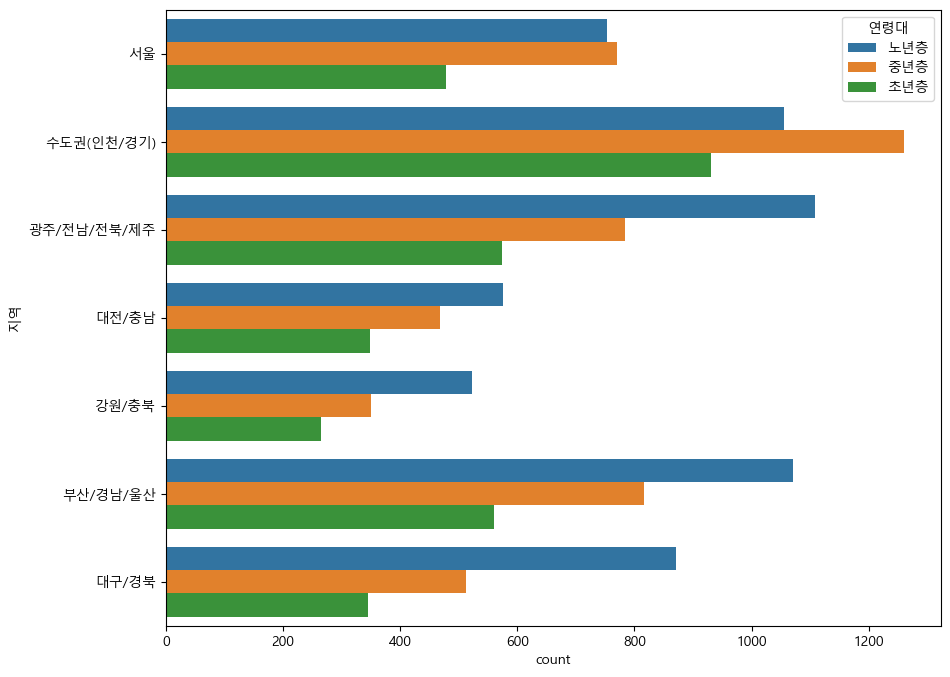

In [205]:
plt.figure(figsize=(10, 8))
sns.countplot(data=ex_eight_merge, y='지역', hue='연령대')

In [206]:
result=ex_eight_merge.groupby('지역')['연령대'].value_counts(normalize=True).reset_index(name='인원수')
result['인원수_백분율']=round(result['인원수'] * 100, 1)
result

# 인원수 : 연령대 값의 비율 계산  normalize=True / 기본값:인원수
# 백분율 : 인원수의 백분율

,지역,연령대,인원수,인원수_백분율
0,강원/충북,노년층,0.459103,45.9
1,강원/충북,중년층,0.308707,30.9
2,강원/충북,초년층,0.232190,23.2
3,광주/전남/전북/제주,노년층,0.449311,44.9
4,광주/전남/전북/제주,중년층,0.317924,31.8
5,광주/전남/전북/제주,초년층,0.232766,23.3
6,대구/경북,노년층,0.504051,50.4
7,대구/경북,중년층,0.296296,29.6
8,대구/경북,초년층,0.199653,20.0
9,대전/충남,노년층,0.413372,41.3


In [213]:
pivot_df=result.pivot_table(index='지역', columns='연령대', values='인원수_백분율')
pivot_df

연령대,노년층,중년층,초년층
지역,,,
강원/충북,45.9,30.9,23.2
광주/전남/전북/제주,44.9,31.8,23.3
대구/경북,50.4,29.6,20.0
대전/충남,41.3,33.6,25.0
부산/경남/울산,43.8,33.4,22.9
서울,37.6,38.5,23.9
수도권(인천/경기),32.5,38.8,28.7


<Axes: ylabel='지역'>

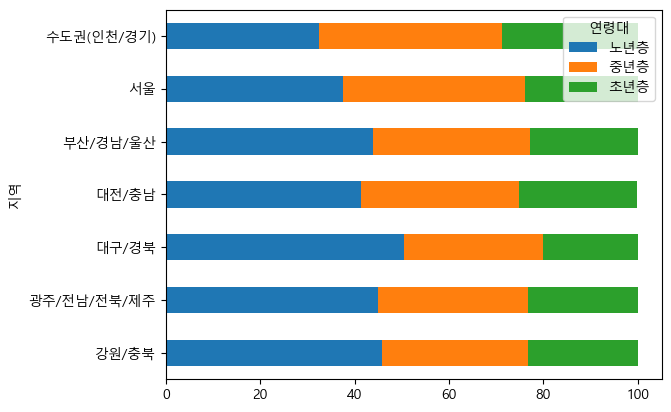

In [215]:
# 가로 막대 
pivot_df.plot.barh(stacked=True)

# https://wikidocs.net/158849
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

In [217]:
# 비율
ex_eight_crosstab=pd.crosstab(ex_eight_merge['지역'], ex_eight_merge['연령대'], normalize='all')
ex_eight_crosstab   

연령대,노년층,중년층,초년층
지역,,,
강원/충북,0.036205,0.024345,0.018310
광주/전남/전북/제주,0.076848,0.054376,0.039811
대구/경북,0.060411,0.035511,0.023928
대전/충남,0.039881,0.032459,0.024136
부산/경남/울산,0.074282,0.056665,0.038840
서울,0.052226,0.053475,0.033153
수도권(인천/경기),0.073172,0.087391,0.064572


<Axes: ylabel='지역'>

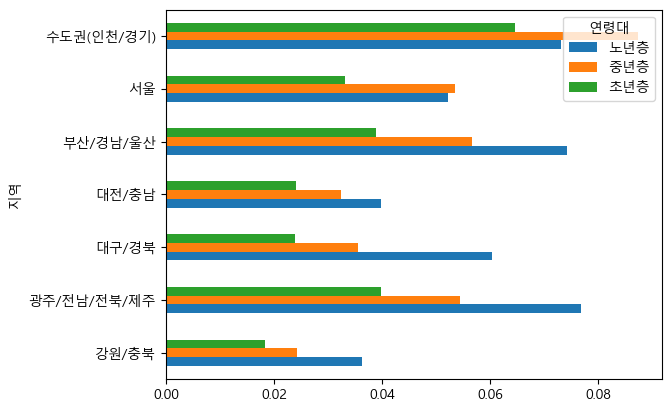

In [219]:
ex_eight_crosstab.plot.barh() 

In [221]:
ex_eight_crosstab=pd.crosstab(ex_eight_merge['지역'], ex_eight_merge['연령대'], normalize='all')
ex_eight_crosstab       # 백분율

연령대,노년층,중년층,초년층
지역,,,
강원/충북,0.036205,0.024345,0.018310
광주/전남/전북/제주,0.076848,0.054376,0.039811
대구/경북,0.060411,0.035511,0.023928
대전/충남,0.039881,0.032459,0.024136
부산/경남/울산,0.074282,0.056665,0.038840
서울,0.052226,0.053475,0.033153
수도권(인천/경기),0.073172,0.087391,0.064572


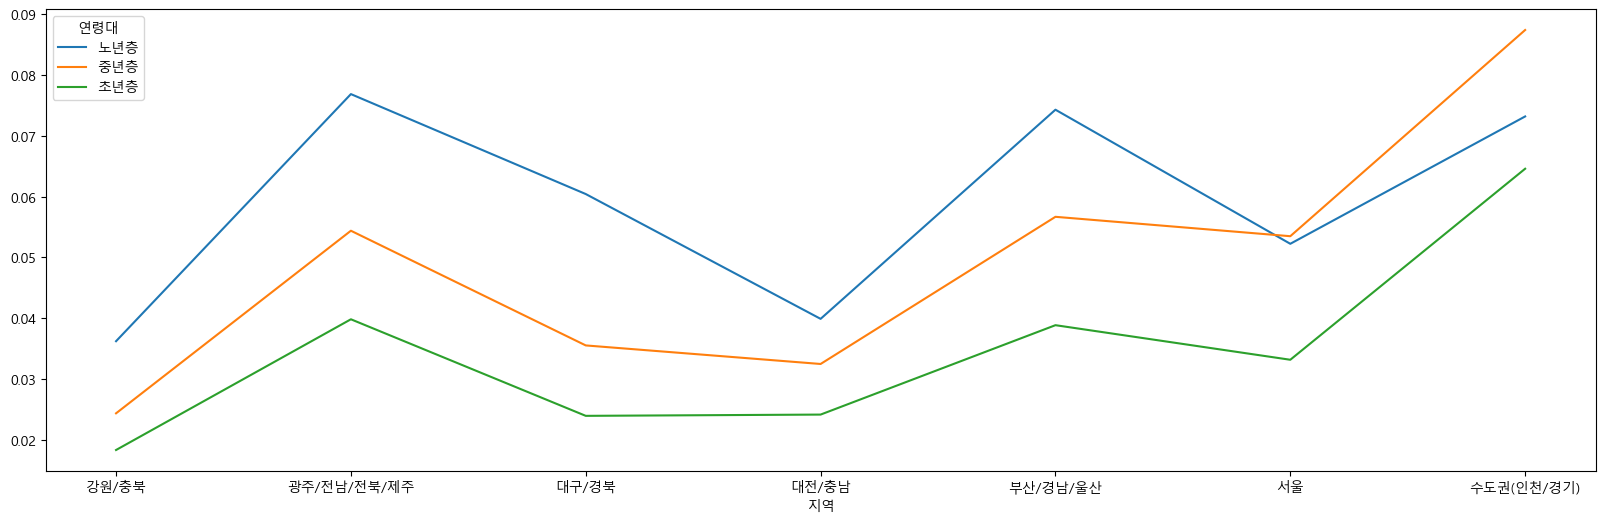

In [223]:
ax=ex_eight_crosstab.plot.line()

fig=ax.get_figure()
fig.set_size_inches(20, 6) 

In [225]:
# 귀무가설(H₀): 지역별 연령대 분포는 서로 독립적이다.
# 대립가설(H₁): 지역별 연령대 분포는 서로 독립적이지 않다.

stats.chi2_contingency(ex_eight_crosstab)
# 귀무가설 참, 귀무가설 기각 실패, 연령대별 지역 거주는 연관성이 없다.

Chi2ContingencyResult(statistic=0.014714503623000877, pvalue=0.9999999999999998, dof=12, expected_freq=array([[0.03257108, 0.0271453 , 0.01914337],
       [0.07064229, 0.05887451, 0.0415194 ],
       [0.04950117, 0.04125513, 0.02909389],
       [0.0398473 , 0.03320943, 0.02341991],
       [0.07012666, 0.05844477, 0.04121634],
       [0.05735031, 0.04779674, 0.03370715],
       [0.09298657, 0.07749662, 0.05465206]]))